In [2]:
%pip install py_vncorenlp

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4388 sha256=02f2138bebbe3f5d4564f5e9de70c501c22f1b5441a2212f35c312be3c2b2f36
  Stored in directory: c:\users\lea26\appdata\local\pip\cache\wheels\6d\2d\d6\158260bfd6820d144535857b80cc112bee5c3aa6d81b6dc049
Successfully built py_vncorenlp

   ---------------------------------------- 2/2 [py_vncorenlp]

Note: you may need to restart the kernel to use updated packages.


In [30]:


import pandas as pd

sequences = pd.read_csv('src/data/csv/dishes.csv').combined_info.values
sequences

array(['MÓN KHAI VỊ, Bánh xèo, Đổ bột gạo pha nước cốt dừa, chiên vàng giòn cùng topping, Bột gạo, tôm, thịt ba chỉ, giá đỗ,..., Đồ béo, Thơm và béo của nước cốt dừa hoà quyện cùng topping (tôm, thịt,..), 2-3 người',
       'MÓN KHAI VỊ, Bánh khọt nước dừa, Đổ bột gạo pha nước cốt dừa vào khuôn nhỏ, chiên giòn cùng topping, Bột  gạo, nước cốt dừa, tôm, Đồ béo, Thơm và béo của nước cốt dừa hoà quyện cùng topping (tôm, thịt,..), 2-3 người',
       'MÓN KHAI VỊ, Hến xúc bánh đa, Hến xào hành, rau răm, ăn kèm bánh đa, Hến, rau răm, bánh đa, Đồ mặn, cay, Vị ngọt béo tự nhiên của hến, cay nhẹ của ớt và rau răm, tiêu, 1-2 người',
       'MÓN KHAI VỊ, Mực chiên giòn, Mực tẩm bột chiên xù, chiên vàng, Mực, bột chiên, Đồ béo, Mực tươi, béo của bột chiên giòn, 2-3 người',
       'MÓN KHAI VỊ, Cơm cháy mỡ hành chà bông, Cơm cháy chiên giòn, rưới mỡ hành, rắc chà bông, Gạo, chà bông, hành lá, Đồ mặn, Thơm mỡ hành, chà bông, 2-3 người',
       'MÓN KHAI VỊ, Sụn gà rang muối, Sụn gà chiên giòn, rang 

In [37]:
%pip install stanza

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------- ----------- 0.8/1.1 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 9.0 MB/s  0:00:00
   ---------------------------------------- 0.0/608.4 kB ? eta -:--:--
   ---------------------------------------- 608.4/608.4 kB 21.6 MB/s  0:00:00

   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ------------- -------------------------- 1/3 [emoji]
   -------------------------- ------------- 2/3 [stanza]
   -------------------------- ------------- 2/3

In [6]:
import stanza
# stanza.download('vi')
nlp = stanza.Pipeline('vi', processors='tokenize,pos,lemma,ner', use_gpu=True)
doc = nlp("Tôi yêu AI. Nó thật hay!")
sentences = [sentence.text for sentence in doc.sentences]

2025-09-26 05:42:31 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-09-26 05:42:31 INFO: Downloaded file to C:\Users\lea26\stanza_resources\resources.json
2025-09-26 05:42:32 INFO: Loading these models for language: vi (Vietnamese):
| Processor | Package    |
--------------------------
| tokenize  | vtb        |
| pos       | vtb_charlm |
| lemma     | identity   |
| ner       | vlsp       |

2025-09-26 05:42:32 WARNING: GPU requested, but is not available!
2025-09-26 05:42:32 INFO: Using device: cpu
2025-09-26 05:42:32 INFO: Loading: tokenize
2025-09-26 05:42:32 INFO: Loading: pos
2025-09-26 05:42:33 INFO: Loading: lemma
2025-09-26 05:42:33 INFO: Loading: ner
2025-09-26 05:42:34 INFO: Done loading processors!


In [11]:
doc = nlp("Tôi thích ăn tôm khô. ng ăn tôm thì gọi món khác bạn có món nào không")
sentences = [sentence.text for sentence in doc.sentences]
sentences

['Tôi thích ăn tôm khô.', 'ng ăn tôm thì gọi món khác bạn có món nào không']

In [ ]:
from vncorenlp import VnCoreNLP
with VnCoreNLP("VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') as vncore:
    sentences = vncore.tokenize("Tôi yêu AI. Nó thật hay!")

In [20]:
train_txt

'món khai vị bánh xèo đổ bột gạo pha nước cốt dừa chiên vàng giòn cùng topping tôm thịt ba chỉ giá đỗ đồ béo thơm và béo của hòa quyện người bánh khọt vào khuôn nhỏ hến xúc bánh đa hến xào hành rau răm ăn kèm bánh đa mặn cay vị ngọt béo tự nhiên hến cay nhẹ ớt tiêu mực giòn mực tẩm xù chiên đồ béo mực tươi béo cơm cháy mỡ hành chà bông giòn rưới mỡ hành rắc chà bông gạo chà hành lá thơm sụn gà rang muối giòn rang với hong kong muối rang nhẹ mùi chả mực hạ long giã tay vàng mực gia vị tươi ốc bươu nhồi băm hấp sả ốc bươu thịt băm sả ốc tươi thơm sả nước mắm sốt tỏi tôm bọc cốm xanh quết bọc chiên giòn tươi cốm đồ béo chả giò hải sản cuốn bánh tráng chảo kho quẹt phồng trắng khô mỡ hành ăn chơi hỏi heo quay da giòn ăn bánh hỏi sống chua ngọt mắm chua chua ngọt xôi chiên xôi phồng rắc gạo nếp nếp hành mỡ chà bắp rút xương lên mẹt xương hấp thái lát mắm nêm mắm kèm đồ bắp giò tươi mắm nêm cá cá quết nhuyễn thì là cá chiên gân bò xào cần tây nem nướng than hoa xay bò viên lèo nấu hầm mặn bé

In [7]:
import pandas as pd
import re
from collections import Counter
from underthesea import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

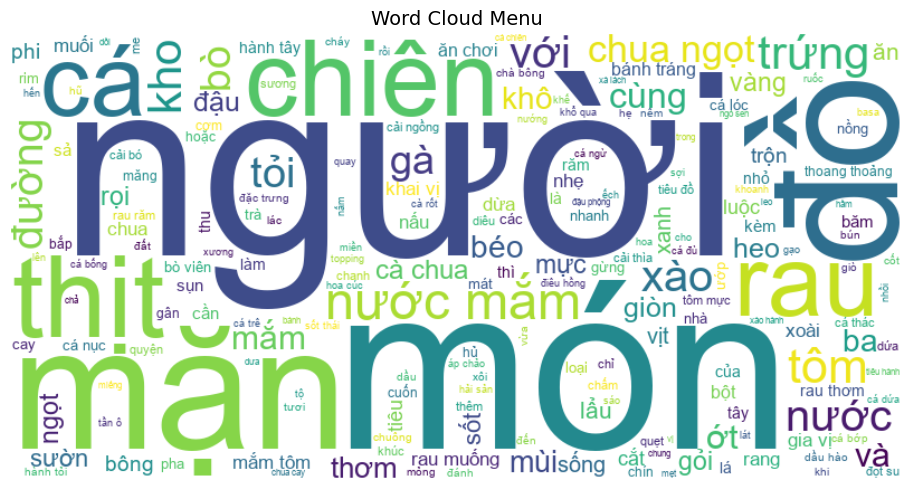

In [9]:
df = pd.read_csv("./src/data/csv/dishes.csv")

def build_text_series(df, col="combined_info"):
    all_text = " ".join(df[col].astype(str))
    all_text = re.sub(r"[^\w\s]", " ", all_text)
    tokens = word_tokenize(all_text.lower())
    tokens = [t for t in tokens if len(t) > 1 and not t.isdigit()]
    return tokens

tokens = build_text_series(df)
freq = Counter(tokens)

font_path = r"C:\Windows\Fonts\arial.ttf"   # chứa tiếng Việt ổn
wc = WordCloud(width=800, height=400,
               background_color="white",
               font_path=font_path,
               collocations=False).generate_from_frequencies(freq)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Menu", fontsize=14)
plt.tight_layout()
plt.show()

In [10]:
print("Word total", freq.total())
freq.most_common(freq.total())[:50]

Word total 3248


[('người', 123),
 ('món', 103),
 ('mặn', 88),
 ('đồ', 87),
 ('thịt', 78),
 ('chiên', 68),
 ('rau', 60),
 ('cá', 60),
 ('nước mắm', 59),
 ('tôm', 50),
 ('kho', 48),
 ('trứng', 47),
 ('nước', 43),
 ('với', 43),
 ('xào', 43),
 ('đường', 40),
 ('tỏi', 37),
 ('bò', 36),
 ('gà', 35),
 ('chua ngọt', 34),
 ('cùng', 31),
 ('ớt', 30),
 ('và', 29),
 ('mắm', 29),
 ('ba', 25),
 ('béo', 25),
 ('khô', 25),
 ('mùi', 24),
 ('thơm', 22),
 ('giòn', 20),
 ('heo', 20),
 ('đậu', 20),
 ('cà chua', 19),
 ('vàng', 18),
 ('mực', 18),
 ('ngọt', 18),
 ('gỏi', 18),
 ('rọi', 18),
 ('sốt', 17),
 ('sườn', 17),
 ('ăn', 16),
 ('lẩu', 16),
 ('xanh', 15),
 ('sống', 15),
 ('vịt', 15),
 ('bông', 14),
 ('trộn', 14),
 ('phi', 14),
 ('tiêu', 13),
 ('cắt', 13)]

| Ký hiệu | Tên gốc       | Ý nghĩa tiếng Việt    | Ví dụ                    |
| ------- | ------------- | --------------------- | ------------------------ |
| **N**   | Noun          | danh từ               | thịt, cá, bánh, nước mắm |
| **V**   | Verb          | động từ               | chiên, kho, xào, nướng   |
| **A**   | Adjective     | tính từ               | béo, cay, giòn, ngọt     |
| **P**   | Preposition   | giới từ               | trong, với, ra, vào      |
| **CH**  | Punctuation   | dấu câu               | , . ; ! ?                |
| **M**   | Numeral       | số / số lượng         | 1, 2, 145000, ba, năm    |
| **Nb**  | Number        | số đếm / lượng từ     | hai, ba, mười            |
| **Ny**  | Pronoun       | đại từ nhân xưng      | tôi, mình, ta, họ        |
| **R**   | Adverb        | phó từ                | rất, khá, cũng, đã       |
| **L**   | Determiner    | hạn định từ           | này, kia, đó, ấy         |
| **I**   | Interjection  | thán từ               | à, nhé, ạ, ôi            |
| **E**   | Exclamation   | cảm thán              | chao, trời, ha           |
| **C**   | Conjunction   | liên từ               | và, hay, nhưng, vì       |
| **T**   | Time          | thời gian từ          | hôm, nay, mai, sáng      |
| **D**   | Demonstrative | chỉ thị từ            | đây, đấy, kia            |
| **Nc**  | Classifier    | danh từ phụ (loại từ) | con, cái, chiếc, lát     |


In [12]:
from underthesea import pos_tag
from collections import Counter
import pandas as pd

# 1. Ghép toàn bộ văn bản
text = " ".join(df['combine_info'].astype(str).tolist())

# 2. Tách & gán nhãn POS toàn bộ
tokens_pos = pos_tag(text.lower())        # list[(từ, loại_từ), ...]

# 3. Đếm theo nhãn POS
pos_counts = Counter(pos for _, pos in tokens_pos)

# 4. Xem kết quả
summary = (pd.Series(pos_counts)
             .rename_axis('POS')
             .reset_index(name='token_count')
             .sort_values('token_count', ascending=False))

# 0. Bảng tra cứu
pos_meaning = {
    'N':'danh từ', 'V':'động từ', 'A':'tính từ', 'P':'giới từ',
    'CH':'dấu câu', 'M':'số', 'Nb':'số đếm', 'Ny':'đại từ',
    'R':'phó từ', 'L':'hạn định từ', 'I':'thán từ', 'E':'cảm thán',
    'C':'liên từ', 'T':'thời gian từ', 'D':'chỉ thị từ', 'Nc':'loại từ'
}

# 1. Thống kê đã có từ bước trước
summary['meaning'] = summary['POS'].map(pos_meaning)

# 2. Sắp xếp lại cho đẹp
summary = summary[['POS', 'meaning', 'token_count']].sort_values('token_count', ascending=False)
print(summary.to_string(index=False))

POS      meaning  token_count
  N      danh từ         2038
 CH      dấu câu         1392
  V      động từ          728
  A      tính từ          311
  E     cảm thán           69
  C      liên từ           60
  M           số           46
 Nc      loại từ           31
  R       phó từ           19
  L  hạn định từ            8
 FW          NaN            2
  T thời gian từ            2
  X          NaN            1
  P      giới từ            1


In [2]:
from langchain_mcp_adapters.client import MultiServerMCPClient
from langchain_mcp_adapters.tools import load_mcp_tools


client = MultiServerMCPClient({
    "hybridsearch": {
        "url": "http://localhost:8000/mcp", 
        "transport": "streamable_http"
    }
})
async with client.session("hybridsearch") as session:
    tools = await load_mcp_tools(session)
    print(tools)
    # call tool
    results = await session.call_tool("hybrid_search",
    {
        "query": "tôm rau muống và heniken",
        "k": 30 
    })
    print([ d for d in results])


[StructuredTool(name='init_database', description='...', args_schema={'properties': {}, 'type': 'object'}, metadata={'_meta': {'_fastmcp': {'tags': []}}}, response_format='content_and_artifact', coroutine=<function convert_mcp_tool_to_langchain_tool.<locals>.call_tool at 0x00000293B5843A60>), StructuredTool(name='hybrid_search', description="Retrieve restaurant and dish info from the knowledge base.\nSupports:\n- Restaurant details: name, location, cuisine, opening hours\n- Dish details: name, ingredients, dietary info, cooking style\nIncreasing 'k' allows fetching more candidate results for better coverage.", args_schema={'properties': {'query': {'description': 'Restaurant or dish name, location, or type', 'maxLength': 300, 'minLength': 3, 'title': 'Query', 'type': 'string'}, 'k': {'default': 30, 'description': 'Number of top results to retrieve: 30=fast, 50=broad', 'enum': [30, 50], 'title': 'K', 'type': 'integer'}, 'cuisine': {'default': '', 'description': 'Optional cuisine type to 

In [32]:
for i in results.content[0].text.split(','):
    print(i.strip())  # loại bỏ khoảng trắng thừa ở đầu và cuối mỗi mục

[{"id":null
"metadata":{"name_of_food":"Rau muống xào tỏi"
"current_price":"115
000"
"outstanding_fragrance":"Rau muống
tỏi"
"taste":"Đồ mặn"
"row":95
"id":"44c1a134175ba3feca988222f5567320"
"source":"src/data/csv/dishes.csv"
"type_of_food":"MÓN RAU"
"_id":"96"
"main_ingredients":"Rau muống
tỏi"
"how_to_prepare":"Rau muống xào nhanh lửa lớn với tỏi"
"number_of_people_eating":"2-3 người"}
"page_content":"\ntext: MÓN RAU
Rau muống xào tỏi
Rau muống xào nhanh lửa lớn với tỏi
Rau muống
tỏi
Đồ mặn
Rau muống
tỏi
2-3 người"
"type":"Document"}
{"id":null
"metadata":{"name_of_food":"Tôm rim mặn"
"current_price":"165
000"
"outstanding_fragrance":"Tôm
nước mắm
tiêu"
"taste":"Đồ mặn"
"row":64
"id":"b5f6c2f78d7a170a77f06952d23a29c7"
"source":"src/data/csv/dishes.csv"
"type_of_food":"MÓN TÔM & MỰC"
"_id":"65"
"main_ingredients":"Tôm
nước mắm"
"how_to_prepare":"Tôm rim cùng nước mắm
đường"
"number_of_people_eating":"2-3 người"}
"page_content":"\ntext: MÓN TÔM & MỰC
Tôm rim mặn
Tôm rim cùng nước mắm
đ

In [2]:
import asyncio
from langchain_mcp_adapters.client import MultiServerMCPClient
from langchain_mcp_adapters.tools import load_mcp_tools

client = MultiServerMCPClient({
    "restaurant": {
        "url": "http://localhost:8000/mcp",
        "transport": "streamable_http"
    }
})

async def call_tool(name, args=None):
    async with client.session("restaurant") as session:
        result = await session.call_tool(name, args or {})
        print(f"\n=== {name} ===")
        for content in result.content:
            print(content.text)

# 1. list tools
async with client.session("restaurant") as session:
    tools = await load_mcp_tools(session)
    print("=== Danh sách tools ===")
    for t in tools:
        print(f"- {t.name}: {t.description}")
        
await call_tool(
    "search_database", 
    {
        "req": {
            "query": "ếch hay cua đồng xào nấu với lá giang", "k": 10 # yêu cầu: id 109
            }
    }
)

=== Danh sách tools ===
- hybrid_search: Retrieve restaurant and dish info from the knowledge base.
Supports:
- Restaurant details: name, location, cuisine, opening hours
- Dish details: name, ingredients, dietary info, cooking style
Increasing 'k' allows fetching more candidate results for better coverage.
- search_database: Tìm món ăn theo tên, tag hoặc ingredient
- xem_schema: Xem schema graph hiện tại
- tim_theo_gia: Tìm món ≤ giá tối đã
- feedback_bill: Khách phản hồi → chuỗi noun-phrase

=== search_database ===
[{"id":"109","name_food":"Lẩu ếch lá giang","score":43.515140533447266},{"id":"108","name_food":"Lẩu cua đồng","score":29.883581161499023},{"id":"112","name_food":"Lẩu Dượng Bầu","score":13.291526794433594},{"id":"22","name_food":"Ếch chiên nước mắm","score":12.456134796142578},{"id":"82","name_food":"Trứng chiên hành","score":7.481426239013672},{"id":"74","name_food":"Gà tre hấp mắm nhĩ","score":7.304370880126953},{"id":"102","name_food":"Canh diêu hồng nấu ngót","score":

In [1]:
import asyncio
from langchain_mcp_adapters.client import MultiServerMCPClient

client = MultiServerMCPClient({
    "restaurant": {
        "url": "http://localhost:8000/mcp",
        "transport": "streamable_http"
    }
})

async def call_tool(name, args=None):
    async with client.session("restaurant") as session:
        result = await session.call_tool(name, args or {})
        print(f"\n=== {name} ===")
        for content in result.content:
            print(content.text)
            
await call_tool("init_database")


=== init_database ===
✅ Đã khởi tạo dữ liệu mẫu vào Neo4j


In [4]:
await call_tool(
    "search_database", 
    {
        "req": {
            "query": "dượng bầu", "k": 10
            }
    }
)


=== search_database ===
[{"id":"112","name_food":"Lẩu Dượng Bầu","score":15.498052597045898},{"id":"92","name_food":"Rau luộc thập cẩm kho quẹt","score":6.620233535766602}]


In [5]:
await call_tool(
    "search_database", 
    {
        "req": {
            "query": "rau và cay", "k": 10
            }
    }
)


=== search_database ===
[{"id":"26","name_food":"Gỏi mực chua cay","score":12.21330451965332},{"id":"3","name_food":"Hến xúc bánh đa","score":12.178555488586426},{"id":"29","name_food":"Gỏi tôm sốt thái","score":10.106949806213379},{"id":"68","name_food":"Tôm rang muối cay","score":7.444516181945801},{"id":"15","name_food":"Bắp giò heo rút xương lên mẹt","score":6.868581771850586},{"id":"51","name_food":"Cá thu chiên mắm xoài","score":6.578128814697266},{"id":"27","name_food":"Gỏi cuốn tôm thịt","score":6.417447090148926},{"id":"13","name_food":"Bánh hỏi heo quay","score":6.27520751953125},{"id":"71","name_food":"Sườn cọng chiên muối ớt","score":5.497570991516113},{"id":"30","name_food":"Gỏi gà bắp chuối","score":5.420327186584473}]


In [6]:
# 3. tim_theo_gia
await call_tool(
    "tim_theo_gia",
    {
        "req": {
            "max_price": 150000
            }
    }
)


=== tim_theo_gia ===
[{"id":"5","ten":"Cơm cháy mỡ hành chà bông","current_price":"150,000"},{"id":"14","ten":"Xôi chiên chà bông","current_price":"150,000"},{"id":"19","ten":"Bò viên nước lèo","current_price":"150,000"},{"id":"20","ten":"Bò viên gân chiên","current_price":"150,000"},{"id":"21","ten":"Chả giò tôm đất","current_price":"150,000"},{"id":"27","ten":"Gỏi cuốn tôm thịt","current_price":"150,000"},{"id":"28","ten":"Gỏi dưa leo tôm khô","current_price":"150,000"},{"id":"34","ten":"Thịt kho tiêu","current_price":"150,000"},{"id":"36","ten":"Ba rọi cháy cạnh","current_price":"150,000"},{"id":"37","ten":"Thịt luộc cà pháo mắm tôm","current_price":"150,000"},{"id":"39","ten":"Ba rọi mắm ruốc","current_price":"150,000"},{"id":"40","ten":"Ba rọi rim dừa","current_price":"150,000"},{"id":"47","ten":"Cá trê chiên mắm xoài","current_price":"150,000"},{"id":"49","ten":"Cá sặc trộn xoài","current_price":"150,000"},{"id":"50","ten":"Mắm kho miền Tây","current_price":"150,000"},{"id":"52"

In [7]:
await call_tool(
    "search_database", 
    {
        "req": {
            "query": "2-3 người", "k": 10
            }
    }
)

await call_tool(
    "search_database", 
    {
        "req": {
            "query": "huhu haha hihi cứt", "k": 10
            }
    }
)

await call_tool(
    "search_database", 
    {
        "req": {
            "query": "1 người", "k": 10
            }
    }
)


=== search_database ===
[{"id":"7","name_food":"Chả mực Hạ Long","score":0.8391076326370239},{"id":"57","name_food":"Khô cá đù","score":0.8391076326370239},{"id":"58","name_food":"Khô cá dứa","score":0.8391076326370239},{"id":"66","name_food":"Tôm rim","score":0.8391076326370239},{"id":"59","name_food":"Khô cá lóc","score":0.8391076326370239},{"id":"95","name_food":"Nụ bí xào tỏi","score":0.8391076326370239},{"id":"65","name_food":"Tôm rim mặn","score":0.8161534070968628},{"id":"60","name_food":"Mực chiên giòn","score":0.8161534070968628},{"id":"97","name_food":"Đọt su xào tỏi","score":0.8161534070968628},{"id":"96","name_food":"Rau muống xào tỏi","score":0.8051407933235168}]

=== search_database ===
[EMPTY RESULT] This keyword/keyphrase is not found in neo4j

=== search_database ===
[{"id":"120","name_food":"Trà đá","score":5.405044078826904},{"id":"122","name_food":"Nước suối","score":5.156006336212158},{"id":"121","name_food":"Coca/ 7 UP","score":5.002350330352783},{"id":"123","nam

In [3]:
# 4. xem_schema
tools = await call_tool("xem_schema")


=== xem_schema ===
{"nodes":[{"id":-103,"labels":["Order"],"name":"Order","indexes":["customer_id","dish_id"],"constraints":["Constraint( id=20, name='order_unique_id', type='UNIQUENESS', schema=(:Order {order_id}), ownedIndex=6 )"]},{"id":-107,"labels":["Behaviour"],"name":"Behaviour","indexes":[],"constraints":["Constraint( id=26, name='behaviour_unique_id', type='UNIQUENESS', schema=(:Behaviour {behaviour_id}), ownedIndex=10 )"]},{"id":-101,"labels":["Customer"],"name":"Customer","indexes":["phone","email"],"constraints":["Constraint( id=22, name='customer_unique_id', type='UNIQUENESS', schema=(:Customer {customer_id}), ownedIndex=4 )"]},{"id":-102,"labels":["Ingredient"],"name":"Ingredient","indexes":[],"constraints":["Constraint( id=21, name='ingredient_unique_name', type='UNIQUENESS', schema=(:Ingredient {name}), ownedIndex=5 )"]},{"id":-106,"labels":["Feedback"],"name":"Feedback","indexes":["target_type,target_id","customer_id"],"constraints":["Constraint( id=25, name='feedback

In [1]:
import asyncio
from langchain_mcp_adapters.client import MultiServerMCPClient
from langchain_mcp_adapters.tools import load_mcp_tools

client = MultiServerMCPClient({
    "restaurant": {
        "url": "http://localhost:8000/mcp",
        "transport": "streamable_http"
    }
})

async def call_tool(name, args=None):
    async with client.session("restaurant") as session:
        result = await session.call_tool(name, args or {})
        print(f"\n=== {name} ===")
        for content in result.content:
            print(content.text)

# 1. list tools
async with client.session("restaurant") as session:
    tools = await load_mcp_tools(session)
    print("=== Danh sách tools ===")
    for t in tools:
        print(f"- {t.name}: {t.description}")

# 4. xem_schema
tools = await call_tool("xem_schema")

# # 2. hybrid_search
# await call_tool(
#     "hybrid_search", 
#     {
#         "req": {
#             "query": "cay", "k": 1
#             }
#     }
# )

# 3. tim_theo_gia
await call_tool(
    "tim_theo_gia",
    {
        "req": {
            "max_price": 1000000
            }
    }
)

# # 5. goi_y_mua_kem
# await call_tool(
#     "goi_y_mua_kem", 
#     { 
#         "req" : {
#             "dish_id": "D001"
#             }
#     }
# )

# await call_tool(
#     "feedback_bill", 
#     {
#     "req" : {
#         "customer_id": "C001",
#         "bill_id": "B001",
#         "dish_id": "D001",
#         "text": "Cơm ngon lắm nha có điều ớt khô ít cay"
#         }
#     }
# )

# await call_tool(
#     "feedback_bill", 
#     {
#     "req" : {
#         "customer_id": "C001",
#         "bill_id": "B001",
#         "dish_id": "D001",
#         "text": "Món cơm này bị mặn quá, lại còn nguội nữa rất là tuyệt"
#         }
#     }
# )

=== Danh sách tools ===
- init_database: ...
- hybrid_search: Retrieve restaurant and dish info from the knowledge base.
Supports:
- Restaurant details: name, location, cuisine, opening hours
- Dish details: name, ingredients, dietary info, cooking style
Increasing 'k' allows fetching more candidate results for better coverage.
- search_database: Tìm món ăn theo tên, tag hoặc ingredient
- xem_schema: Xem schema graph hiện tại
- tim_theo_gia: Tìm món ≤ giá tối đã
- feedback_bill: Khách phản hồi → chuỗi noun-phrase

=== xem_schema ===
{"nodes":[{"id":-102,"labels":["Order"],"name":"Order","indexes":[],"constraints":[]},{"id":-107,"labels":["CustomerCare"],"name":"CustomerCare","indexes":[],"constraints":[]},{"id":-105,"labels":["Behaviour"],"name":"Behaviour","indexes":[],"constraints":[]},{"id":-101,"labels":["Customer"],"name":"Customer","indexes":[],"constraints":[]},{"id":-104,"labels":["Feedback"],"name":"Feedback","indexes":[],"constraints":[]},{"id":-103,"labels":["Question"],"nam

In [8]:
# await call_tool(
#     "feedback_bill", 
#     {
#     "req" : {
#         "customer_id": "C001",
#         "bill_id": "B001",
#         "dish_id": "D0041",
#         "text": "Khá là tuyệt"}
#     }
# )

In [10]:
async def test_list_tools():
    async with client.session("restaurant") as session:
        tools = await load_mcp_tools(session)
        print("=== Danh sách tools ===")
        for t in tools:
            print(f"- {t.name}: {t.description}")

await test_list_tools()

await call_tool("hybrid_search", {
    "query": "bún chả",
    "k": 30
})

await call_tool("tim_theo_gia", {
    "max_price": 50000
})

await call_tool("xem_schema")

await call_tool("goi_y_mua_kem", {
    "dish_id": "D001"
})


=== Danh sách tools ===
- hybrid_search: Retrieve restaurant and dish info from the knowledge base.
Supports:
- Restaurant details: name, location, cuisine, opening hours
- Dish details: name, ingredients, dietary info, cooking style
Increasing 'k' allows fetching more candidate results for better coverage.
- search_database: Tìm món ăn theo tên, tag hoặc ingredient
- xem_schema: Xem schema graph hiện tại
- tim_theo_gia: Tìm món ≤ giá tối đã
- feedback_bill: Khách phản hồi → chuỗi noun-phrase

=== hybrid_search ===
[{"id":null,"metadata":{"name_of_food":"Cơm cháy chảo kho quẹt","current_price":"155,000","outstanding_fragrance":"Kho quẹt, mỡ hành","taste":"Đồ mặn","row":11,"id":"c3be3fc3e2b6a7a629803ce9d3176f16","source":"src/data/csv/dishes.csv","type_of_food":"MÓN KHAI VỊ","_id":"12","main_ingredients":"Cơm, Cơm trắng, tôm khô, thịt ba chỉ, chà bông","how_to_prepare":"Cơm chiên phồng, Cơm trắng chiên phồng, ăn kèm kho quẹt tôm khô","number_of_people_eating":"2-3 người"},"page_content"


=== hybrid_search ===
meta=None content=[TextContent(type='text', text="Input validation error: 'req' is a required property", annotations=None, meta=None)] structuredContent=None isError=True



=== tim_theo_gia ===
meta=None content=[TextContent(type='text', text="Input validation error: 'req' is a required property", annotations=None, meta=None)] structuredContent=None isError=True

=== xem_schema ===
meta=None content=[TextContent(type='text', text="Error calling tool 'xem_schema': Object of type Node is not JSON serializable", annotations=None, meta=None)] structuredContent=None isError=True



=== goi_y_mua_kem ===
meta=None content=[TextContent(type='text', text="Input validation error: 'req' is a required property", annotations=None, meta=None)] structuredContent=None isError=True


In [ ]:
async with client.session("hybridsearch") as session:
    results = await session.call_tool("hybrid_search", {
        "query": "món bún chả",
        "k": 30
    })
    print(results)


meta=None content=[TextContent(type='text', text="Error calling tool 'hybrid_search': not enough values to unpack (expected 3, got 0)", annotations=None, meta=None)] structuredContent=None isError=True


In [5]:
async with client.session("hybridsearch") as session:
    schema = await session.call_tool("xem_schema", {})
    print(schema)


meta=None content=[TextContent(type='text', text="Error calling tool 'xem_schema': Object of type Node is not JSON serializable", annotations=None, meta=None)] structuredContent=None isError=True


In [8]:
import pandas as pd
file_path="src\data\hoanghamobile_with_summary.csv"
df = pd.read_csv(file_path, nrows=1, encoding="utf-8")
all_columns = df.columns.tolist()
# Define which column will be the content
content_column = "combined_info"
# All other columns go into metadata (exclude content_column)
metadata_columns = [col for col in all_columns if col != content_column]

from langchain_community.document_loaders import CSVLoader
loader = CSVLoader(file_path,
    csv_args={
        'delimiter': ',',
        'quotechar': '"'
    },
    content_columns=content_column,
    metadata_columns=metadata_columns,
    encoding='utf-8'
)
documents = loader.load()